In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import os

In [12]:
os.listdir('/Users/ahmed/Desktop/Kaggle/tumeur')

file_list = []
label_list = []
for root,dirs,files in os.walk('/Users/ahmed/Desktop/Kaggle/tumeur'):
    for file in files:
        if '.jpg' in file:
            
            val = root.split('/')
            
            if 'no_tumor' in val:
                label_list.append(0)
            else:
                label_list.append(1)
            
            file_list.append(os.path.join(root,file))
file_list

['/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(115).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(142).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(49).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(1).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(284).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(154).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(292).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(103).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(197).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(178).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(73).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(251).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(314).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(24).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image (26).jpg',
 '/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(206).jpg

In [13]:
img = PIL.Image.open('/Users/ahmed/Desktop/Kaggle/tumeur/no_tumor/image(30).jpg')
#img = img.convert('L')
np.array(img).shape

(236, 236, 3)

In [14]:
minimum = 1000
compteur = 0
for image in file_list:
    img = PIL.Image.open(image)
    shape = np.array(img).shape
    if min(shape[0],shape[1]) < minimum:
        minimum = min(shape[0],shape[1])
        
print(minimum)

180


In [181]:
df = []
for image in file_list:
    img = PIL.Image.open(image)
    img = img.resize((28,28))
    img = img.convert('L')
    df.append(np.array(img))

In [182]:
data = np.array(df)

In [183]:
data.shape

(2870, 28, 28)

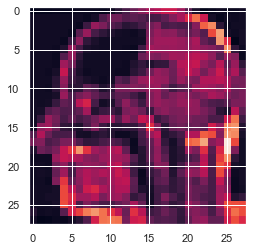

In [184]:
plt.imshow(data[0][0:28].reshape(28,28))

In [185]:
x,y,z = data.shape
data_r = data.reshape(x,y*z)
data_r = pd.DataFrame(data_r)

In [186]:
data_r.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1,2,2,3,3,3,4,4,4,3,...,28,18,34,48,51,34,35,70,85,74
1,2,2,2,2,2,2,2,2,3,5,...,22,23,28,59,66,22,2,4,5,4
2,10,3,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,1
3,6,6,6,5,5,5,5,6,6,6,...,5,5,5,5,5,5,5,6,6,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
data_r['Label'] = label_list

In [188]:
data_r.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,1,2,2,3,3,3,4,4,4,3,...,18,34,48,51,34,35,70,85,74,0
1,2,2,2,2,2,2,2,2,3,5,...,23,28,59,66,22,2,4,5,4,0
2,10,3,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,1,0
3,6,6,6,5,5,5,5,6,6,6,...,5,5,5,5,5,5,6,6,7,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
data_r['Label'].value_counts()

1    2475
0     395
Name: Label, dtype: int64

Vérifier que le pixel max est de 255

In [190]:
data_r['Label'].value_counts()

1    2475
0     395
Name: Label, dtype: int64

In [191]:
X = data_r.drop(['Label'],axis=1)
y = data_r['Label']

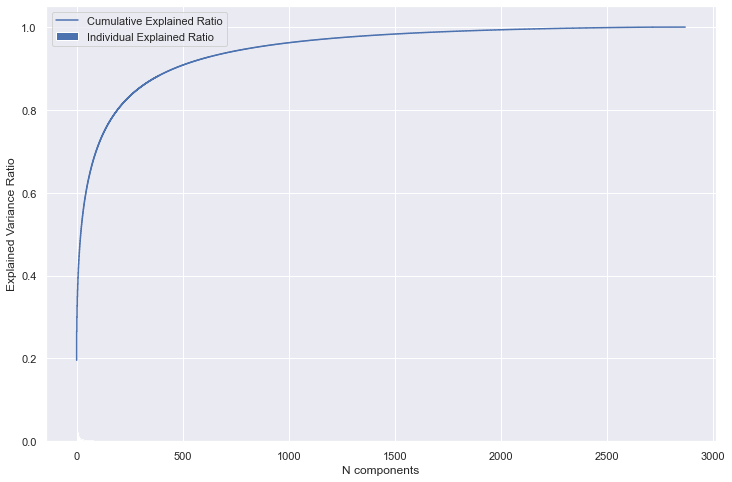

In [165]:
sns.set_theme()
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

In [166]:
pca = PCA(0.95)
pca.fit(X)

X_pca = pd.DataFrame(pca.transform(X))
X_pca

,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
0,-1409.365427,-4625.750256,-1254.117720,1184.908881,775.551761,514.646409,506.359048,-274.008999,-122.459439,28.692099,...,45.201262,6.275785,-10.372157,-158.021215,3.410001,46.919291,-40.235372,71.715916,-67.716579,-66.774308
1,6989.409004,3889.307983,1859.560731,-1740.484152,-1628.820428,-1178.890786,814.991389,-88.562897,-1694.538508,-2057.110874,...,-8.619681,29.753616,-10.824921,9.028845,-15.507826,-15.818632,-6.239600,17.138655,-24.060915,-19.296187
2,-2045.658989,1110.957403,369.726216,-527.065104,-726.326580,194.944580,1394.812712,143.766753,-741.556701,343.165362,...,-33.240646,-15.880121,-84.445981,59.068103,-139.058611,7.683110,-27.990959,5.176181,38.467329,-95.492395
3,45.228197,-164.246180,52.537188,-661.422304,-246.333971,-1609.698593,-384.570728,-1635.204891,-506.577619,821.622737,...,41.014759,-34.175012,-50.985495,-61.002264,78.499274,35.086618,-40.649130,17.952508,-78.315548,43.831799
4,-2110.017953,1363.827122,382.610295,-596.012542,426.137857,-280.588166,499.570179,1206.018814,-304.009615,827.435371,...,99.328863,-29.958330,-52.940001,-14.747794,-27.297476,-120.278323,-22.216852,-126.268815,36.590242,63.396982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,108.763714,25.616499,1713.827655,-1751.530222,-519.907159,1247.954505,1014.304730,426.569312,-1431.624731,118.851947,...,-64.096959,-45.778823,-87.830161,-75.891355,31.590380,-24.280259,-35.598623,110.848407,-48.066725,-0.449141
2866,2460.938513,-1035.982999,1882.694866,866.520355,-1375.077377,-554.562394,571.808669,-454.598666,1614.200667,141.197577,...,67.509754,32.095244,-1.177302,6.910573,-18.608611,-113.166816,-38.728859,29.044850,-2.855503,-70.980315
2867,2900.021713,-1147.869012,-502.698806,2123.403343,-189.604014,-2282.790497,-1121.494422,834.960119,-947.661763,-128.431676,...,-71.137920,18.884876,84.588090,-41.374558,-47.788124,-11.796107,-11.649293,-8.348185,122.357753,52.521357
2868,-1588.950194,40.172906,1873.841518,-1069.073832,-174.369128,-944.518722,1596.562260,26.720302,-178.061479,617.125411,...,18.403369,-29.942948,-18.719522,149.482986,83.199163,-23.309816,10.981113,-11.848382,-28.161046,5.739493


In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [168]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [192]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [231]:
rUs = RandomOverSampler()
X_ru, y_ru = rUs.fit_resample(X_train, y_train)

In [232]:
model = make_pipeline(StandardScaler(),RandomForestClassifier())
model.fit(X_ru , y_ru)
model.score(X_test,y_test)

0.9703832752613241

In [233]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_ru,y_ru,cv=3).mean()

0.9818831822759315

In [234]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [235]:
pred = model.predict(X_test)

In [236]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        86
           1       0.99      0.98      0.98       488

    accuracy                           0.97       574
   macro avg       0.94      0.95      0.94       574
weighted avg       0.97      0.97      0.97       574



In [214]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred)

0.9384531071292413

In [206]:
confusion_matrix(y_test,pred)

array([[ 77,   9],
       [ 10, 478]])

In [127]:
X

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1,2,2,3,3,3,4,4,4,3,...,28,18,34,48,51,34,35,70,85,74
1,2,2,2,2,2,2,2,2,3,5,...,22,23,28,59,66,22,2,4,5,4
2,10,3,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,1
3,6,6,6,5,5,5,5,6,6,6,...,5,5,5,5,5,5,5,6,6,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
2866,4,4,5,5,5,5,5,5,5,5,...,48,54,37,34,57,20,8,7,7,8
2867,2,2,2,2,2,2,2,3,2,3,...,51,71,86,80,61,67,91,19,2,4
2868,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,1,1,1,0,0,0


In [222]:
from sklearn.model_selection import StratifiedKFold
accuracy = []

skf = StratifiedKFold(n_splits=20,random_state=None)
skf.get_n_splits(X,y)

for train_index,test_index in skf.split(X,y):
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    
model.fit(X1_train,y1_train)
model.score(X1_test,y1_test)

0.972027972027972

In [223]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X1_train,y1_train,cv=3).mean()

0.8980564723138981

In [224]:
pred = model.predict(X1_test)

In [225]:
print(classification_report(y1_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.98      0.99      0.98       124

    accuracy                           0.97       143
   macro avg       0.96      0.92      0.94       143
weighted avg       0.97      0.97      0.97       143

